<a href="https://colab.research.google.com/github/Janebhop/fraud-detection-course/blob/main/EDA/Fraud_Detection_Part_I_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)

## อะไรคือ Exploratory Data Analysis ?
    
&emsp; ในการทำงานทางด้าน Data Science ปฏิเสธเลยไม่ได้ว่าการเลือกใช้ข้อมูลในการทำโมเดลเป็นขั้นตอนที่สำคัญมากขั้นตอนหนึ่ง เพื่อทำให้โมเดลมีประสิทธิภาพที่สูงขึ้น ซึ่งขั้นตอนในการพิจารณาที่จะเลือกใช้ข้อมูลนั้น คือขั้นตอนการทำ Exploratory Data Analysis หรือ EDA นั้นเอง

การทำ EDA เป็นการหารูปแบบเฉพาะที่สำคัญของข้อมูลที่เราสนใจด้วยโมเดลทางสถิติ หรือกราฟทางสถิติ เพื่อหาความสัมพันธ์ระหว่างชุดข้อมูลนั้นๆ ทำให้เข้าใจข้อมูล และอธิบายข้อมูล รวมถึงตั้งคำถามเกี่ยวกับข้อมูลชุดนั้นได้ดีขึ้น

ใน Tutorials ชุดนี้ เป็นการทำ EDA กับ Synthetic PaySim Datasets
> ที่มาข้อมูล : https://www.kaggle.com/ntnu-testimon/paysim1

โดยจะเน้นไปในด้านการทำ Data visualization ด้วยกราฟทางสถิติเพื่อหาความสัมพันธ์ของชุดข้อมูลดังกล่าว

In [1]:
### mount drive
import os,sys
from google.colab import drive
drive.mount('/content/drive')
nb_path = '/content/notebooks'
# %cd /content/
### check current dir 
!pwd
### simulate drive from Colab Notebooks to
os.symlink('/content/drive/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0, nb_path) 

Mounted at /content/drive
/content


In [2]:
### import libary ที่จะใช้
import pandas as pd
import numpy as np
import matplotlib
from matplotlib.cbook import boxplot_stats 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Read data from csv file
pathFile = '/content/drive/My Drive/Fraud Detection PaySim Data/PS_20174392719_1491204439457_log.csv'
df_check = pd.read_csv(pathFile, nrows=10)
float_cols = [c for c in df_check if df_check[c].dtype == "float64"]
float32_cols = {c: np.float32 for c in float_cols}

paysimData = pd.read_csv(pathFile, engine='c', dtype=float32_cols)

In [4]:
paysimData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float32
 3   nameOrig        object 
 4   oldbalanceOrg   float32
 5   newbalanceOrig  float32
 6   nameDest        object 
 7   oldbalanceDest  float32
 8   newbalanceDest  float32
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float32(5), int64(3), object(3)
memory usage: 412.6+ MB


In [5]:
# Check null data
paysimData.isnull().values.any()

False

In [6]:
paysimData.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.639648,C1231006815,170136.0,160296.359375,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.280029,C1666544295,21249.0,19384.720703,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.000000,C1305486145,181.0,0.000000,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.000000,C840083671,181.0,0.000000,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.139648,C2048537720,41554.0,29885.859375,M1230701703,0.0,0.0,0,0


In [7]:
paysimData.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.000000,239.000000,3.350000e+02,743.0
amount,6362620.0,1.779883e+05,5.991358e+05,0.0,13389.570312,74871.937500,2.087215e+05,92445520.0
oldbalanceOrg,6362620.0,8.246191e+05,2.831753e+06,0.0,0.000000,14208.000000,1.073152e+05,59585040.0
newbalanceOrig,6362620.0,8.503204e+05,2.862818e+06,0.0,0.000000,0.000000,1.442584e+05,49585040.0
oldbalanceDest,6362620.0,1.097866e+06,3.369338e+06,0.0,0.000000,132705.664062,9.430367e+05,356015904.0
newbalanceDest,6362620.0,1.221764e+06,3.629806e+06,0.0,0.000000,214661.445312,1.111909e+06,356179264.0
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.000000,0.000000,0.000000e+00,1.0
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.000000,0.000000,0.000000e+00,1.0


## Bar chart

&emsp; Bar chart เป็นกราฟที่มีลักษณะเป็นรูปแท่ง โดยเหมาะสำหรับเปรียบเที่ยบข้อมูลของแต่ละประเภทที่แตกต่างกัน

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64


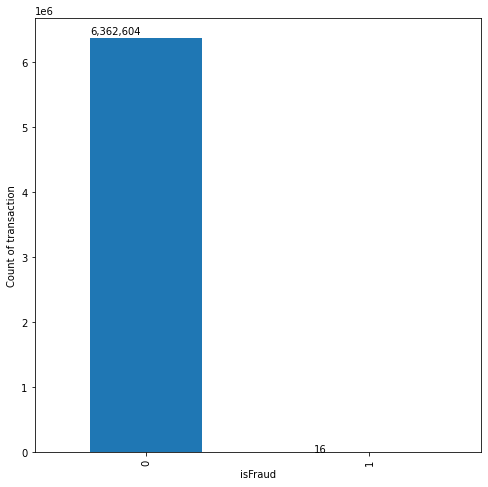

In [8]:
print(paysimData['isFlaggedFraud'].value_counts())
ax = paysimData['isFlaggedFraud'].value_counts().plot(kind='bar', figsize=(8,8))
ax.set_xlabel("isFraud")
ax.set_ylabel("Count of transaction")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

0    6354407
1       8213
Name: isFraud, dtype: int64


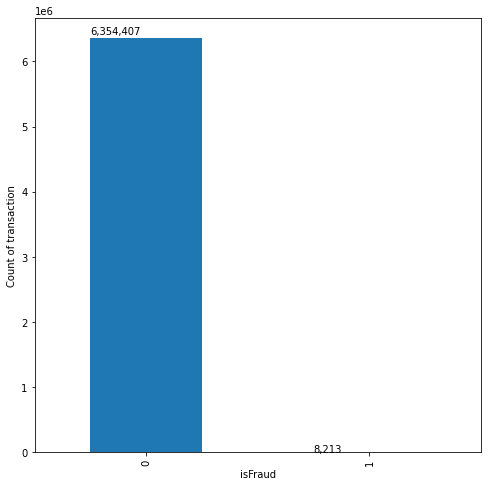

In [9]:
print(paysimData['isFraud'].value_counts())
ax = paysimData['isFraud'].value_counts().plot(kind='bar', figsize=(8,8));
ax.set_xlabel("isFraud")
ax.set_ylabel("Count of transaction")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

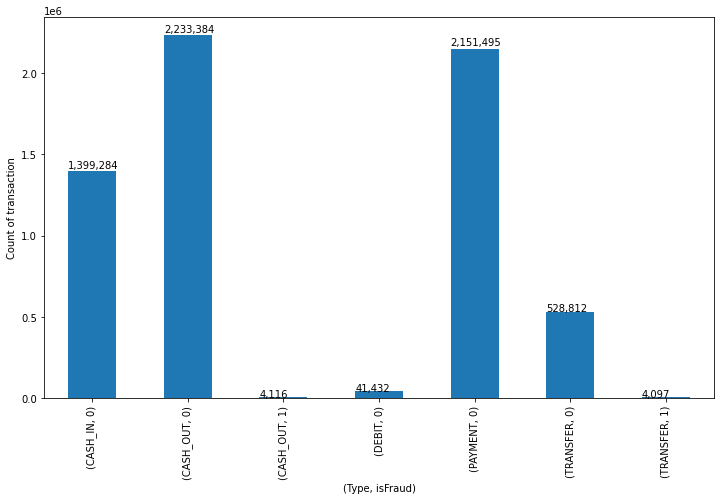

In [10]:
ax = paysimData.groupby(['type', 'isFraud']).size().plot(kind='bar', figsize=(12,7))
ax.set_xlabel("(Type, isFraud)")
ax.set_ylabel("Count of transaction")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

## Strip plot 

Stripplot เป็นกราฟที่ใช้ดูการแจกแจงของของมูลแบบหนึ่ง ซึ่งสามารถเปรียบเทียบลักษณะการกระจายตัวของข้อมูลในแต่ละกลุ่มได้ โดยแกนนอน (แกน x) จะเป็นประเภทของกลุ่มข้อมูล และแกนตั้ง (แกน y) จะแสดงรูปแบบการกระจายตัวของข้อมูล ซึ่งแต่ละค่าจะแทนด้วยจุดแต่ะละจุด

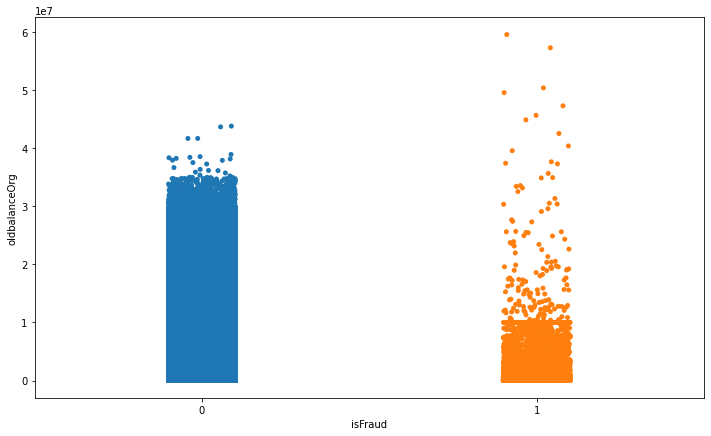

In [11]:
#set x y axis
x_axis = 'isFraud'
y_axis = 'oldbalanceOrg'

#plot stripplot
plt.figure(figsize=(12,7))
ax = sns.stripplot(x=x_axis, y=y_axis,data = paysimData)

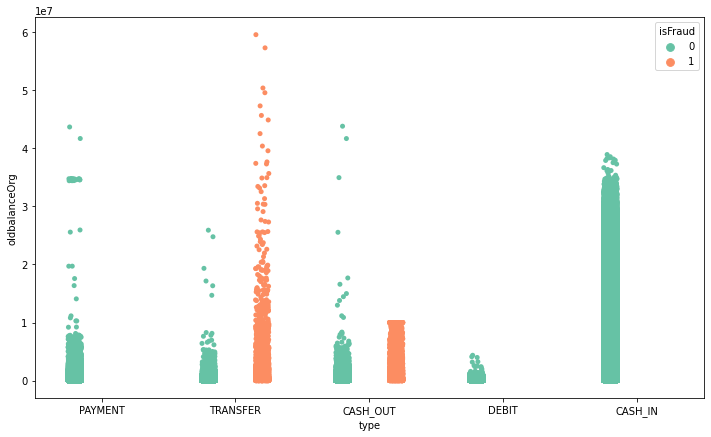

In [12]:
#set x y axis
x_axis = 'type'
y_axis = 'oldbalanceOrg'
#set labeling with
labels = 'isFraud'

plt.figure(figsize=(12,7))
ax = sns.stripplot(x=x_axis, y=y_axis, hue=labels,
                   data=paysimData, palette="Set2", dodge=True)

## Histogram

&emsp; Histogram คือกราฟแท่งที่แสดงถึงความสัมพัทธ์ระหว่างกลุ่มข้อมูลกับความถี่ของข้อมูล เพื่อดูการกระจายตัวของข้อมูล โดยลักษณะของกลุ่มข้อมูลส่วนมากจะมีลักษณะการเรียงจากน้อยไปหามาก ซึ่งแทนด้วยแกนนอน (แกน x) และแกนตั้ง (แกน y) จะแสดงถึงความถี่ของกลุ่มข้อมูลนั้นๆ

In [13]:
paysimData.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

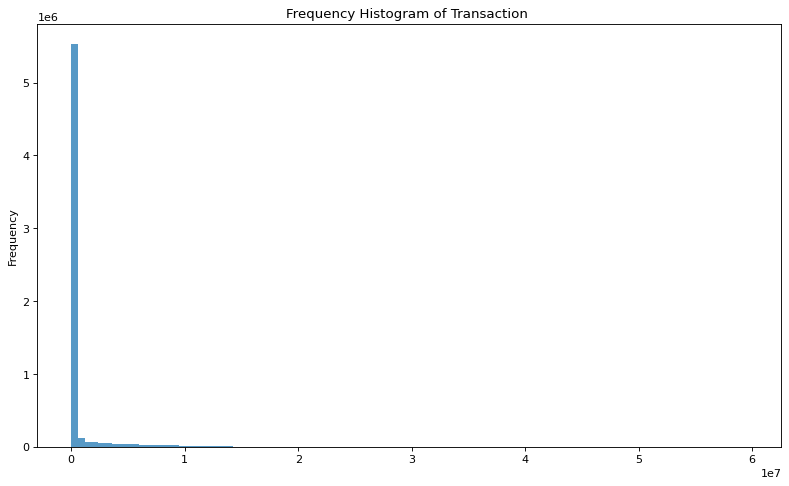

In [14]:
#Select colunm
colSelect = 'oldbalanceOrg'

plt.figure(figsize=(12,7), dpi= 80)
kwargs = dict(alpha=0.75, bins=100)

plt.hist(paysimData[colSelect],**kwargs);
plt.gca().set(title='Frequency Histogram of Transaction ', ylabel='Frequency');

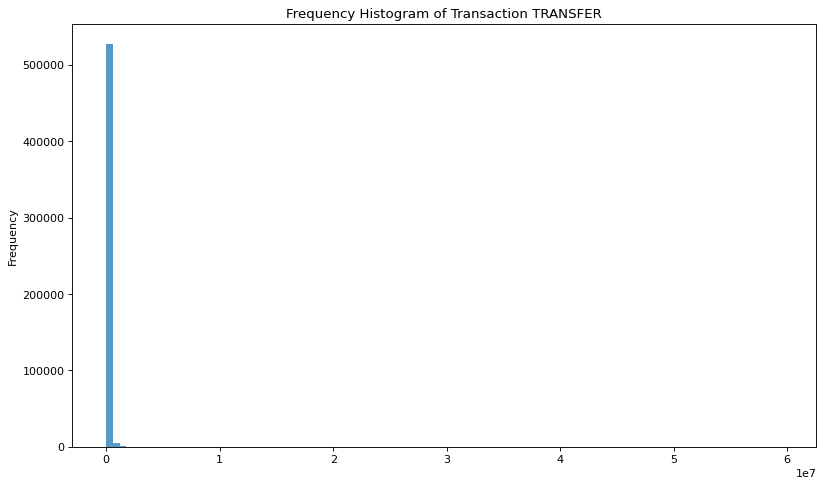

In [15]:
#Select colunm
colSelect = 'oldbalanceOrg'
#Select types of transaction
types = 'TRANSFER'

#plot histogram
plt.figure(figsize=(12,7), dpi= 80)

plt.hist(paysimData[paysimData['type'] == types][colSelect],**kwargs);
plt.gca().set(title='Frequency Histogram of Transaction '+types, ylabel='Frequency');

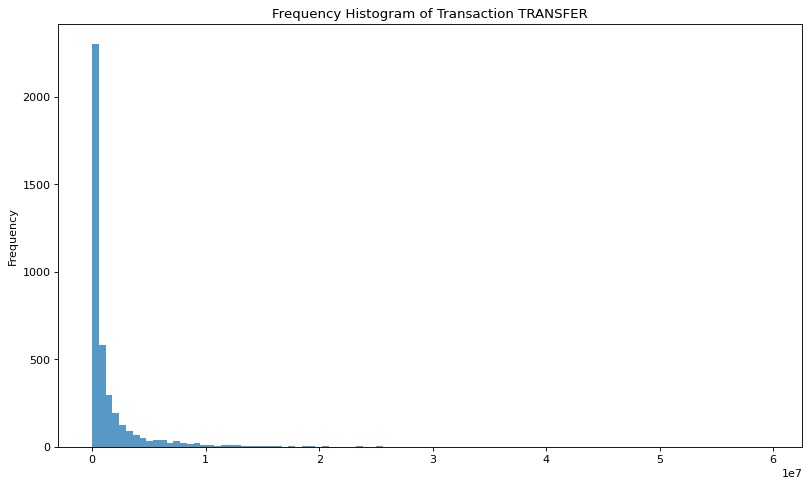

In [16]:
#Select colunm
colSelect = 'oldbalanceOrg'
#Select types of transaction
types = 'TRANSFER'
#Select types of fraud
isFraud = 1

plt.figure(figsize=(12,7), dpi= 80)

plt.hist(paysimData[(paysimData['isFraud'] == isFraud) & (paysimData['type'] == types)][colSelect].reset_index(drop=True),**kwargs);
plt.gca().set(title='Frequency Histogram of Transaction '+types, ylabel='Frequency');

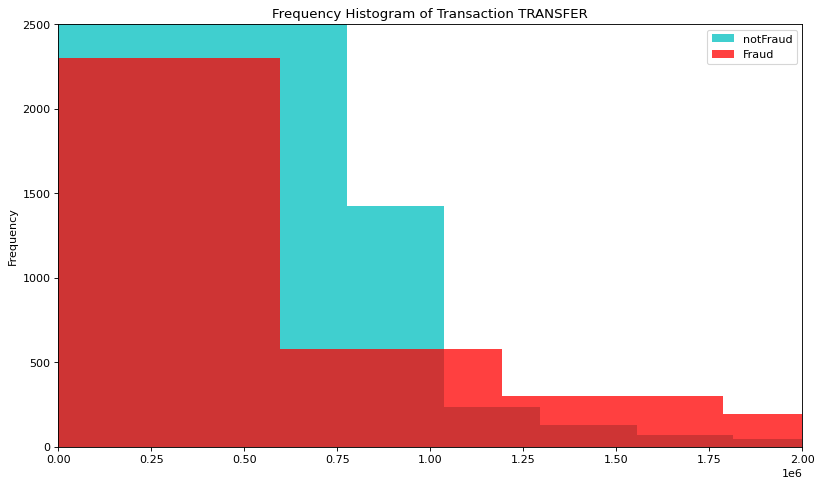

In [17]:
plt.figure(figsize=(12,7), dpi= 80)

plt.hist(paysimData[(paysimData['isFraud'] == 0) & (paysimData['type'] == types)][colSelect].reset_index(drop=True),**kwargs, color='c', label='notFraud');
plt.hist(paysimData[(paysimData['isFraud'] == 1) & (paysimData['type'] == types)][colSelect].reset_index(drop=True),**kwargs, color='r', label='Fraud');
plt.gca().set(title='Frequency Histogram of Transaction '+types, ylabel='Frequency');
plt.ylim(0,2500);
plt.xlim(0,2000000);
plt.legend();

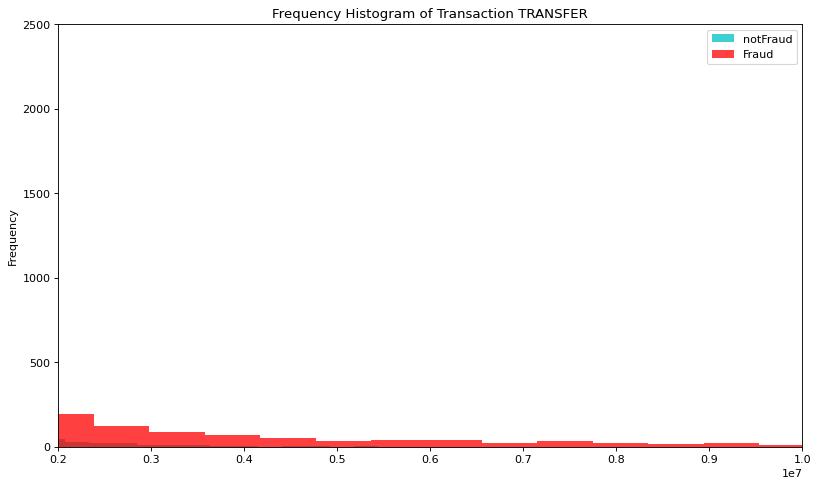

In [18]:
plt.figure(figsize=(12,7), dpi= 80)

plt.hist(paysimData[(paysimData['isFraud'] == 0) & (paysimData['type'] == types)][colSelect].reset_index(drop=True),**kwargs, color='c', label='notFraud');
plt.hist(paysimData[(paysimData['isFraud'] == 1) & (paysimData['type'] == types)][colSelect].reset_index(drop=True),**kwargs, color='r', label='Fraud');
plt.gca().set(title='Frequency Histogram of Transaction '+types, ylabel='Frequency');
plt.ylim(0,2500);
plt.xlim(2000000,10000000);
plt.legend();

## Box plot

&emsp; Box plot เป็นกราฟที่อธิบายถึงการกระจายตัวของข้อมูลว่ามีลักษณะการแจงแจงอย่างไร โดยจะแสดงถึงค่า Max, Min, Medien และ Outlier ของข้อมูลชุดนั้น

In [19]:
paysimData.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [20]:
#Select values columns
selectCol = 'amount'

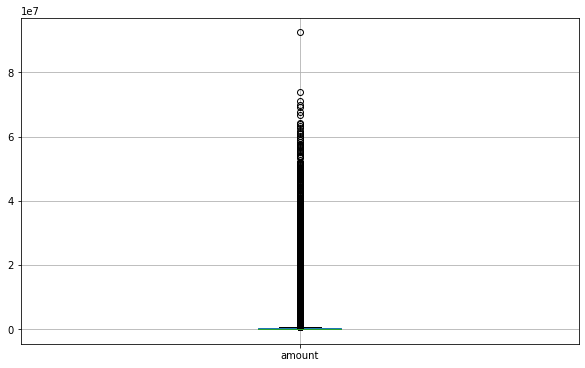

In [21]:
paysimData.boxplot(column=[selectCol] ,figsize=(10,6));

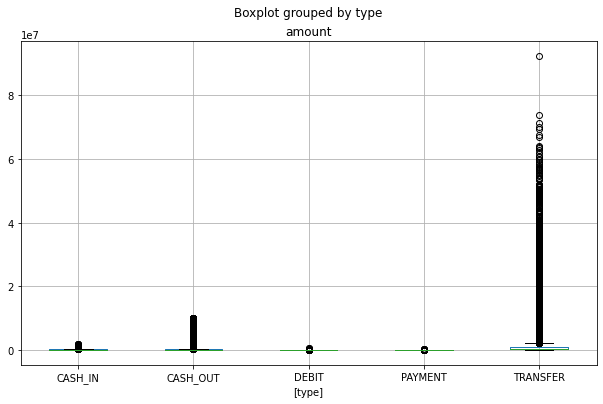

In [22]:
paysimData.boxplot(column=[selectCol], by=['type'] ,figsize=(10,6));

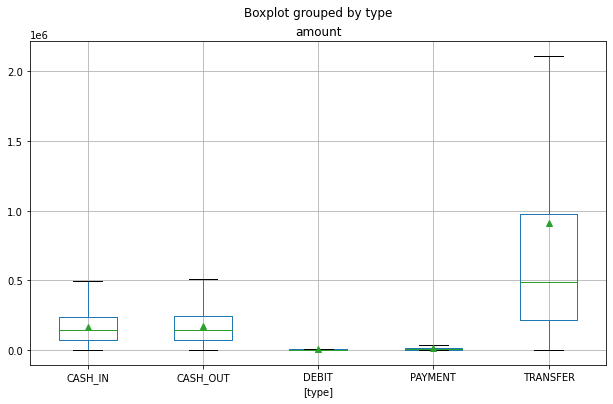

In [23]:
paysimData.boxplot(column=[selectCol], by=['type'], figsize=(10,6)
                   , showmeans=True
                   , showfliers=False);

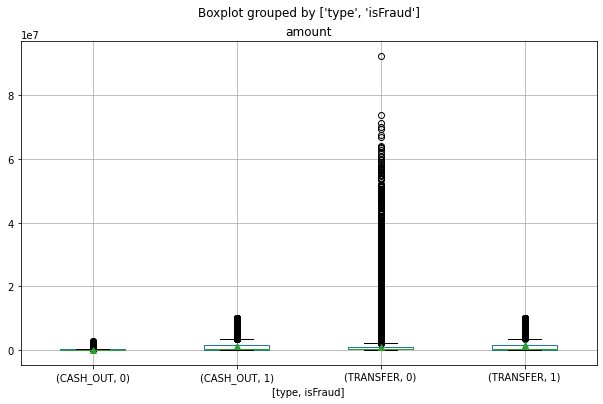

In [24]:
paysimData[(paysimData['type'] == 'TRANSFER') | (paysimData['type'] == 'CASH_OUT')].boxplot(column=[selectCol]
                                                                                            , by=['type', 'isFraud']
                                                                                            , showmeans=True
#                                                                                             , showfliers=False
                                                                                            , figsize=(10,6));

## Line chart

&emsp; Line chart เป็นกราฟที่แสดงถึงลักษณะแนวโน้มของข้อมูลตามช่วงเวลา โดยแกนนอนจะแสดงถึงช่วงเวลา (Time Series) และแกนตั้งจะแสดงถึงค่าต่างๆที่สนใจ

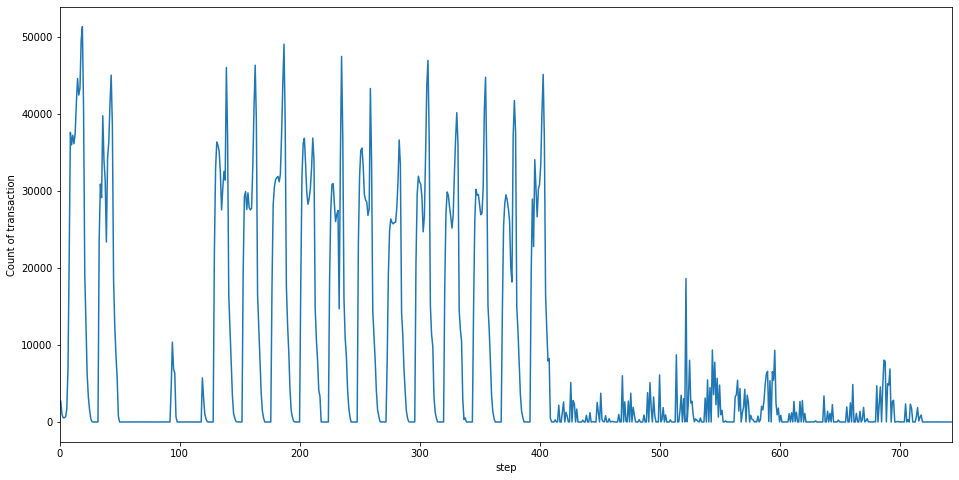

In [25]:
ax = paysimData.groupby(['step'])['step'].count().plot(figsize=(16,8));
ax.set_xlabel("step");
ax.set_ylabel("Count of transaction");
plt.xlim(0,744);

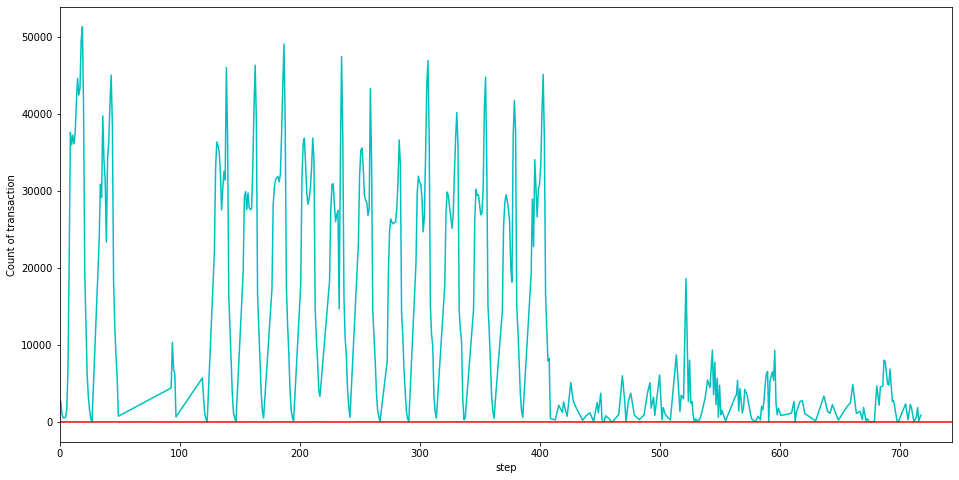

In [26]:
ax = paysimData[paysimData['isFraud'] == 0].groupby(['step'])['step'].count().plot(figsize=(16,8), color='c', label='0');
ax = paysimData[paysimData['isFraud'] == 1].groupby(['step'])['step'].count().plot(figsize=(16,8), color='r', label='1');
ax.set_xlabel("step");
ax.set_ylabel("Count of transaction");
plt.xlim(0,744);

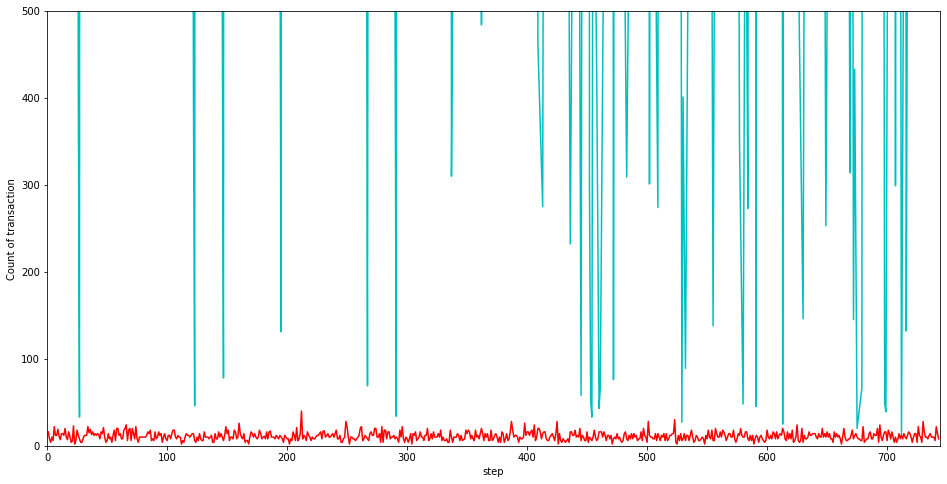

In [27]:
ax = paysimData[paysimData['isFraud'] == 0].groupby(['step'])['step'].count().plot(figsize=(16,8), color='c', label='0');
ax = paysimData[paysimData['isFraud'] == 1].groupby(['step'])['step'].count().plot(figsize=(16,8), color='r', label='1');
ax.set_xlabel("step");
ax.set_ylabel("Count of transaction");
plt.ylim(0,500);
plt.xlim(0,744);